<table>
  <tr><td>
    <img src="h9.png">
  </td></tr>
<table>

# Latar Belakang Project

Harga property dipengaruhi oleh banyak hal. Tidak hanya lokasinya, namun juga spesifikasi rumah tersebut. Projek ini berusaha membuat model peramalan harga rumah dengan fitur-fitur yang ada dalam dataset yang diberikan. Dataset yang kami gunakan adalah:

https://www.kaggle.com/aariyan101/usa-housingcsv


# Masalah & Pertanyaan Bisnis yang bisa dijawab

1. Bagaimana korelasi antara fitur-fitur rumah dengan harga penjualannya?
2. Buatlah model regresi untuk prediksi harga rumah!
3. Buatlah program untuk melakukan prediksi harga rumah!
4. Fitur apa yang memiliki paling tinggi pengaruhnya pada harga jual rumah?

# Tahap-tahap Pemodelan Regresi
 
1. Memuat Dataset
2. Melakukan Data Cleaning
3. Melakukan Data Eksplorasi
3. Melakukan Data Preparation untuk Model Regresi
4. Pemodelan regresi
5. Evaluasi Model Regresi & Memilikih Model yang Terbaik
6. Analisis Fitur yang Paling Berpengaruh

# Memuat Dataset

## Import Library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import pickle

import warnings
warnings.filterwarnings('ignore')

## Membuka Dataset

In [2]:
df=pd.read_csv('USA_Housing.csv')

In [3]:
#Melihat 5 data pertama
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# melihat spesifikasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
#Melihat statistik deskriptif dataset
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Data Cleaning

In [6]:
# Mengecek jumlah missing value setiap kolom
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# Data Exploration

**Melihat distribusi kolom target(harga rumah)**

<AxesSubplot:xlabel='Price', ylabel='Density'>

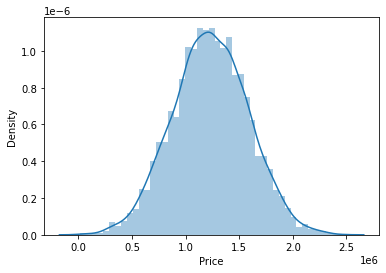

In [7]:
sns.distplot(df["Price"])

**Melihat nilai korelasi antar variabel numerik**

In [8]:
numericfeats=df.dtypes[df.dtypes != 'object'].index

In [9]:
numericfeats

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

<AxesSubplot:>

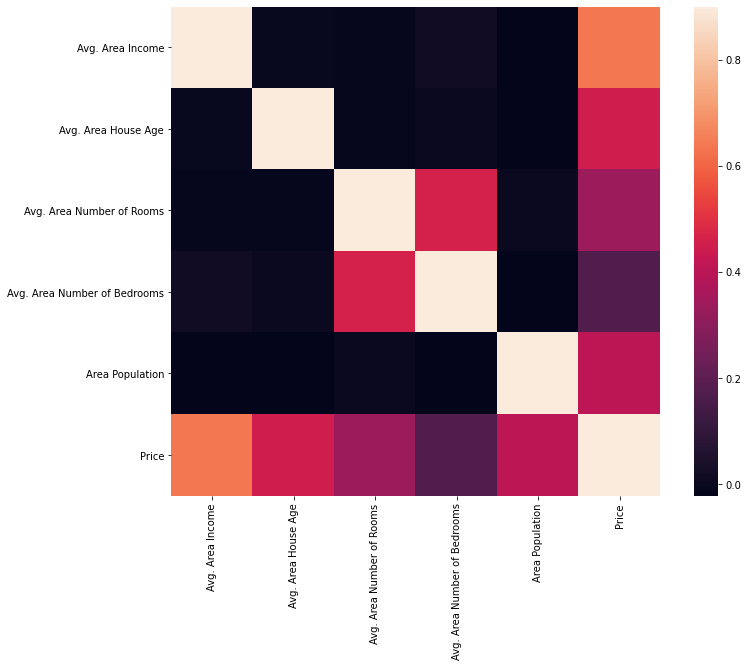

In [10]:
cormat=df[numericfeats].corr()

plt.subplots(figsize=(12,9))
sns.heatmap(cormat, vmax=0.9, square=True)

# Data Preparation

In [11]:
#Membagi dataset menjadi variabel x dan y
X=df.drop(['Price', 'Address'], axis=1)
y=df['Price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

# Pemodelan Regresi (Linear, Ridge, dan Lasso)

In [13]:
model_lr = LinearRegression() 
model_lr.fit(X_train,y_train) 

LinearRegression()

In [14]:
model_ridge = RidgeCV(alphas=[1, 0.1, 0.01, 0.0005])
model_ridge.fit(X_train,y_train) 

RidgeCV(alphas=array([1.e+00, 1.e-01, 1.e-02, 5.e-04]))

In [15]:
model_lasso = LassoCV(alphas=[1, 0.1, 0.01, 0.0005])
model_lasso.fit(X_train,y_train) 

LassoCV(alphas=[1, 0.1, 0.01, 0.0005])

# Evaluasi Model

**R Square Score**

In [16]:
r_sq=model_lr.score(X_train, y_train)
print('r score model Regresi Linear :', r_sq)

r score model Regresi Linear : 0.9181223200568411


In [17]:
r_sq=model_ridge.score(X_train, y_train)
print('r score model Regresi Ridge :', r_sq)

r score model Regresi Ridge : 0.9181222635094928


In [18]:
r_sq=model_lasso.score(X_train, y_train)
print('r score model Regresi Laso :', r_sq)

r score model Regresi Laso : 0.9181223200388778


**RMSE**

In [19]:
def rmse_cv(model):
    return np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))

In [20]:
# Model 1: Regresi Linear
model_lr=LinearRegression()
rmse_cv(model_lr).mean()

101250.05261319065

In [21]:
# Model 2: Regression Ridge 
model_ridge = RidgeCV(alphas=[1, 0.1, 0.01, 0.0005])
rmse_cv(model_ridge).mean()

101249.62443348778

In [22]:
# Model 3: Regression Lasso 
model_lasso = LassoCV(alphas=[1, 0.1, 0.01, 0.0005])
rmse_cv(model_lasso).mean()

101250.07160607015

**Kesimpulan**: 

Ketiga Model Regresi Hanya Memiliki Perbedaan yang Sangat Kecil.

Kemudian dipilih model yang paling sederhana yaitu Regresi Linear

# Analisis Fitur Paling Berpengaruh

In [23]:
coef=pd.Series(model_lr.fit(X,y).coef_, index=X.columns)

In [24]:
imp_coef=pd.concat([coef.sort_values().head(10),
                    coef.sort_values().tail(10)])

<AxesSubplot:>

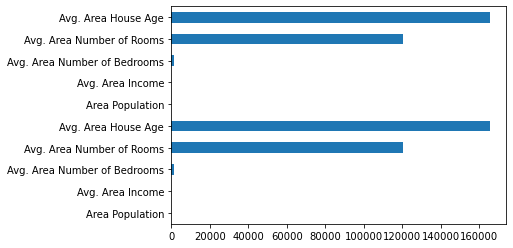

In [25]:
imp_coef.plot(kind='barh')

Berdasarkan plot di atas maka fitur yang paling berpengaruh adalah `Avg. Area House Age` dan `Avg. Area Number of Rooms`. 

# Mengekspor model ke dalam file Pickle

Menyiapkan model untuk proses selanjutnya

In [28]:
pickle.dump(model_lr, open('model.pkl','wb'))

In [29]:
Pkl_Filename = "model.pkl" 

# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

LinearRegression()